In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation # do the animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML  # display the animation in notebook

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# <b>Game of Life</b>

<p style='text-align: justify;'>Game of Life (GoF) is a cellular automaton devised by the British mathematician John Horton Conway in 1970. The game is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves, or, for advanced players, by creating patterns with particular properties.
The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent.</p>

In [2]:
# values for cell on or off in the grid
alive = 1 # values for cell alive
dead = 0 # value for cell dead
vals = [alive, dead]

## 1. Basic functions for Game of Life implementation

### 1.1 Grid generation

In [3]:
# I will use a predefined number, then it could be chosen by the user as input.
# Grid = matrix NxN in a two dimensional space
# the random pattern is the default one if not explicitly declared, the same for the size

random = np.random.choice(vals, (50-1)*(50-1), p=[0.2, 0.8]).reshape(50-1, 50-1)

def create_grid(N=50, pattern=random, localisation = 'top left'):
    grid = np.zeros((N, N))
    # we add the pattern to the grid (declaration above)
    grid = add_pattern_to_grid(grid, pattern, localisation)
        
    return grid

### 1.2 Update grid function

At each step in time, the following transitions occur:

* Any live cell with fewer than two live neighbours dies, as if by needs caused by underpopulation.
* Any live cell with more than three live neighbours dies, as if by overcrowding.
* Any live cell with two or three live neighbours lives, unchanged, to the next generation.
* Any dead cell with exactly three live neighbours becomes a live cell.

<img src="images/GameOfLifeDiagram.png" width="200" height="200" align="center"/>

In [4]:
def update_gridImage(frameNum, img, grid):
    
    N=np.size(grid,axis=0)
       
    grid_tmp = grid.copy() # not to mess up with the original one
    for i in range(N):
        for j in range(N):
            # get the total number of neighbors of the cell
            neighbors = grid[(i+1)%N,j] + grid[i,(j+1)%N] + grid[(i-1)%N,j] + grid[i,(j-1)%N] + grid[(i+1)%N,(j+1)%N] + grid[(i-1)%N,(j-1)%N] + grid[(i+1)%N,(j-1)%N] + grid[(i-1)%N,(j+1)%N]
 
            # check if it is still alive or not
            if grid[i, j] == alive:
                if (neighbors < 2) or (neighbors > 3):
                    grid_tmp[i, j] = dead
            else:
                if neighbors == 3:  # a dead cell with 3 neighbors can reborn
                    grid_tmp[i, j] = alive
 
    grid[:] = grid_tmp[:] # change the old grid
    img.set_data(grid_tmp) # update the image
    
    
    
    return img, grid


# useful for analysis
def update_grid(grid):
    
    N=np.size(grid,axis=0)
       
    grid_tmp = grid.copy() # not to mess up with the original one
    for i in range(N):
        for j in range(N):
            # get the total number of neighbors of the cell
            neighbors = grid[(i+1)%N,j] + grid[i,(j+1)%N] + grid[(i-1)%N,j] + grid[i,(j-1)%N] + grid[(i+1)%N,(j+1)%N] + grid[(i-1)%N,(j-1)%N] + grid[(i+1)%N,(j-1)%N] + grid[(i-1)%N,(j+1)%N]
 
            # check if it is still alive or not
            if grid[i, j] == alive:
                if (neighbors < 2) or (neighbors > 3):
                    grid_tmp[i, j] = dead
            else:
                if neighbors == 3:  # a dead cell with 3 neighbors can reborn
                    grid_tmp[i, j] = alive
 
    grid[:] = grid_tmp[:] # change the old grid
    
    
    return grid

### 1.3 Function for adding the pattern to the grid

<p style='text-align: justify;'>The initial pattern constitutes the 'seed' of the system. The first generation is created by applying the above rules simultaneously to every cell in the seed – births and deaths happen simultaneously, and the discrete moment at which this happens is sometimes called a tick. (In other words, each generation is a pure function of the one before.) The rules continue to be applied repeatedly to create further generations.</p>

In [5]:
# grid : the grid where we want to put the pattern
# pattern : the pattern of alive and death cells we want at the begining
# localisation : the loclisation of the top left celle of the pattern in the grid

# output: the grid with the pattern

def add_pattern_to_grid(grid, pattern, localisation = 'middle'):
    # dimension of the pattern
    c = np.size(pattern,axis=0)
    l = np.size(pattern,axis=1)
    
    if (localisation == 'top left') :
        grid[1:1+c, 1:1+l] = pattern # add the pattern in the top left corner
    else :
        N = np.size(grid,axis=0) # number of columns (= number of lines)
        grid[N//2:N//2+c, N//2:N//2+l] = pattern # add the pattern in the middle
        
    return grid

### 1.4 Grid animation 
This function provides the code for visualize the animation in jupyter notebook

In [6]:
def show_GoF(grid,frames=200,interval=200):
    # show the grid 
    N=grid.shape[0]
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest', cmap='Greys') 
    animation_grid = FuncAnimation(fig, update_gridImage, fargs=(img, grid, ), frames=200, interval=200, save_count=50) # animation  # init_func=create_grid
    plt.close()
    
    return animation_grid


#### Random pattern animation

In [7]:
# show the GoF grid animation
N = 50
grid = create_grid(N)
animation = show_GoF(create_grid())
# in anaconda prompt you have to do : conda install -c conda-forge ffmpeg 
HTML(animation.to_html5_video()) # must use it in notebook in order to visualize the animation

## 2. GoF Patterns
In the years, a lot of initial seeds, or Patter, were developed. They are calssified according to their behaviour. There are three main categories as listed below:
* Still lifes
* Oscillators
* Spaceships

Other complex patterns were discovered and there are a variety: for example patterns which evolve for long period before stabilizing (called <b>Mehuselahs</b>) or smaller patterns which exhibit infinite growth.

#### <b>Pattern features</b>

Patterns have some distinctive characteristics:
* <b>Occupancy</b>: how many cells are alive in each generation;
* <b>Boundig box</b>: the smallest square grid box that can contains the pattern;
* <b>Period</b>: it is the smallest number of generations that the pattern needs in order to return to its initial state.
* <b>Frequency class</b>: it is a measure of its commonness. The frequency class of an object O, in a given set of objects, is defined as x if the most common object in the set, M, is 2x times as common as O; </br> <img src="images/FrequencyClass.png" width="200" height="0" align="center"/> </br>
* <b>Mod</b>: it is a characteristic of an oscillator or spaceship. It is the smallest number of generations that it takes for it to reappear in its original form, it is may equal to its period;
* <b>Heat</b>: it is a characteristic of an oscillator or spaceship. It is the average number of celss that change state in each generation. The Temperature can be used as metric of heat in proportion to the total number of active cells;
* <b>Volatility</b>: it is a oscillator characteristic. It is the proportion of cells involved in the oscillator which actually oscillate.

Only for the spaceships there are two additional parameters:
* <b>Direction</b>: the way the pattern reappears in a different area;
* <b>Speed</b>: it is expressed in terms of <i>c</i> (metaphorical speed of light), it is a measure of the number of generations that it takes for some effect to travel some given distance. For spaceships it described the number of cells that it has been displaced by after it has gone through one period. It can be seend and displacements divided by the period.

### 2.1 Still lifes pattern

Still lifes are patterns which stay the same in function of the time. They don't change to one generation to the other. They can be thought as oscillators with period equal to 1. <b>Pseudo still life</b> can be built using two or more adjacent islands (non-interacting subparts) which are also still lifes.

2.1.1 <b>Block</b> </br>
It is the simplier and most common still lifes pattern. It is a 2x2 block and its peculiarity it is that can destroy other patterns without being destroyed itself. For this behaviour it is also called <i>Eater</i>.
* <b>Occupancy</b>: 4
* <b>Boundig box</b>: 2x2
* <b>Period</b>: 1
* <b>Frequency class</b>: 0.0

<img src="images/block.png" width="100" height="100" align="center"/>

In [8]:
# block
block = np.array([[alive, alive], 
                  [alive, alive]])

2.1.2 <b>Beehive</b> </br>
It is the second most common still lifes pattern.
* <b>Occupancy</b>: 6
* <b>Boundig box</b>: 4x3
* <b>Period</b>: 1
* <b>Frequency class</b>: 0.9

<img src="images/beehave.png" width="100" height="100" align="center"/>

In [9]:
#beehive
beehive = np.array([ [ 0, alive, alive, 0],
                    [alive, 0, 0, alive], 
                    [ 0, alive, alive, 0,]])

2.1.3 <b>Loaf</b> </br>
* <b>Occupancy</b>: 7
* <b>Boundig box</b>: 4x4
* <b>Period</b>: 1
* <b>Frequency class</b>: 2.7

<img src="images/loaf.png" width="100" height="100" align="center"/>

In [10]:
# loaf
loaf = np.array([[0, alive, alive, 0],
                 [alive, 0, 0, alive],
                 [0, alive, 0, alive],
                 [0, 0, alive, 0]])

2.1.4 <b>Boat</b> </br>
* <b>Occupancy</b>: 5
* <b>Boundig box</b>: 3x3
* <b>Period</b>: 1
* <b>Frequency class</b>: 2.8


<img src="images/boat.png" width="100" height="100" align="center"/>

In [11]:
# boat
boat = np.array([[alive, alive, 0],
                 [alive, 0, alive],
                 [0, alive, 0]])

2.1.5 <b>Tub</b> </br>
* <b>Occupancy</b>: 4
* <b>Boundig box</b>: 3x3
* <b>Period</b>: 1
* <b>Frequency class</b>: 5.0


<img src="images/tub.png" width="100" height="100" align="center"/>

In [12]:
# tub
tub = np.array([[0, alive, 0],
                [alive, 0, alive],
                [0, alive, 0]])

2.1.6 <b>The biggest still life pattern</b> </br> 
<!--
* <b>Occupancy</b>: 4
* <b>Boundig box</b>: 3x3
* <b>Period</b>: 1

 <img src="tub.png" width="100" height="100" align="center"/> -->

In [13]:
biggest_still_life =  np.array([[0,1,0,0,0,1,0,0,0,1,0],
                             [1,0,1,0,1,0,1,0,1,0,1],
                             [1,0,1,0,1,0,1,0,1,0,1],
                             [0,1,1,0,1,0,1,0,1,1,0],
                             [0,0,0,0,1,0,1,0,0,0,0],
                             [0,0,0,0,1,0,1,0,0,0,0],
                             [0,0,0,1,1,0,1,1,0,0,0],
                             [0,0,1,0,0,0,0,1,0,0,0],
                             [0,0,1,1,0,1,1,0,0,0,0],
                             [0,0,0,1,0,1,0,0,0,0,0],
                             [0,0,1,0,0,1,0,0,0,0,0],
                             [0,0,1,0,1,0,0,0,0,0,0],
                             [0,1,1,0,1,1,0,0,0,0,0]])

In [14]:
N=20
grid = create_grid(N, biggest_still_life)
animation = show_GoF(grid,10,50)
animation.save('images/biggest_still_life.mp4', writer=writer)
HTML(animation.to_html5_video())

### 2.2 Oscillators patterns
Oscillators are patterns that returns in their initial state after some generations. It repeats itself indefinitely.

2.2.1 <b>Blinker</b> </br>
It is the smallest and most common oscillator.
* <b>Occupancy</b>: 3
* <b>Boundig box</b>: 3x3
* <b>Period</b>: 2
* <b>Frequency class</b>: 0.1
* <b>Mod</b>: 1
* <b>Heat</b>: 4
* <b>Volatility</b>: 0.80

<img src="images/blinker.gif" width="100" height="100" align="center"/>

In [15]:
# the more simple oscillator 
blinker = np.array([[0, 0, 0],
                    [alive, alive, alive],  
                    [0, 0, 0]])

2.2.2 <b>Toad</b> </br>
* <b>Occupancy</b>: 6
* <b>Boundig box</b>: 4x4
* <b>Period</b>: 2
* <b>Frequency class</b>: 7.1
* <b>Mod</b>: 2
* <b>Heat</b>: 8
* <b>Volatility</b>: 0.80

<img src="images/toad.gif" width="100" height="100" align="center"/>

In [16]:
# toad 
toad = np.array([[0, 0, 0, 0],
                 [0, alive, alive, alive],
                 [alive, alive, alive, 0],
                 [0, 0, 0, 0]])

2.2.3 <b>Beacon</b> </br>
* <b>Occupancy</b>: 6
* <b>Boundig box</b>: 4x4
* <b>Period</b>: 2
* <b>Frequency class</b>: 8.8
* <b>Mod</b>: 2
* <b>Heat</b>: 2
* <b>Volatility</b>: 0.25

<img src="images/beacon.gif" width="100" height="100" align="center"/>

In [17]:
# beacon
beacon = np.array([[alive, alive, 0, 0],
                   [alive, 0, 0, 0],
                   [0, 0, 0, alive],
                   [0, 0, alive, alive]])

2.2.4 <b>Pulsar</b> </br>
* <b>Occupancy</b>: 48
* <b>Boundig box</b>: 15x15
* <b>Period</b>: 3
* <b>Frequency class</b>: 12.1
* <b>Mod</b>: 3
* <b>Heat</b>: 42.7
* <b>Volatility</b>: 0.73

<img src="images/pulsar.gif" width="100" height="100" align="center"/>

In [18]:
# pulsar
pulsar = np.zeros((15, 15))
pulsar[1, 3:6] = alive
pulsar[3:6, 6] = alive
pulsar += pulsar.T
pulsar += pulsar[:, ::-1]
pulsar += pulsar[::-1, :]

2.2.5 <b>Pentadecathlon</b> </br>
* <b>Occupancy</b>: 12
* <b>Boundig box</b>: 16x9
* <b>Period</b>: 15
* <b>Frequency class</b>: 18.6
* <b>Mod</b>: 15
* <b>Heat</b>: 22.4
* <b>Volatility</b>: 1.00

<img src="images/pentadecathlon.gif" width="100" height="100" align="center"/>

In [19]:
pentadecathlon = np.zeros((16, 9))
pentadecathlon[2, 3:6] = alive
pentadecathlon[3:5, 4] = alive
pentadecathlon[5, 3:6] = alive
pentadecathlon[7, 3:6] = alive
pentadecathlon += pentadecathlon[::-1, :]

# or also this : pentadecathlon =  np.ones((1,10))

### 2.3 Spaceships patterns 
These are finite patterns that return to its initial state after a number of generations (known as their period) but in a different location. They have other two characteristics named <i>Direction</i> and <i>Speed</i>.

2.3.1 <b>Glider</b> </br>
It is the smallest, most common, and first-discovered spacechip. They are easily produced (see the <i>Gosper glider gun</i>).
* <b>Occupancy</b>: 5
* <b>Boundig box</b>: 3x3
* <b>Period</b>: 4
* <b>Direction</b>: Diagonal
* <b>Frequency class</b>: 1.8
* <b>Mod</b>: 2
* <b>Heat</b>: 4
* <b>Speed</b>: c/4

<img src="images/glider.gif" width="100" height="100" align="center"/>

In [20]:
glider = np.array([[0, 0, alive], 
                   [alive, 0, alive], 
                   [0, alive, alive]])

In [21]:
# here we can generate the grid with dimension and pattern parameters
# show the grid and the animation
N = 20
grid = create_grid(N, glider) # CHANGE THE PATTERN HERE
#print(grid)

animation = show_GoF(grid)
HTML(animation.to_html5_video())

2.3.2 <b>Lightweight spaceship</b> </br>
* <b>Occupancy</b>: 9
* <b>Boundig box</b>: 5x4
* <b>Period</b>: 4
* <b>Direction</b>: Orthogonal
* <b>Frequency class</b>: 11.2
* <b>Mod</b>: 2
* <b>Heat</b>: 11
* <b>Speed</b>: c/2

<img src="images/small_spaceship.gif" width="100" height="100" align="center"/>

In [22]:
lightweight_spaceship = np.array([[alive, 0, 0, alive, 0],
                                [0, 0, 0, 0, alive],
                                [alive, 0, 0, 0, alive],
                                [0, alive, alive, alive, alive]])

2.3.3 <b>Middleweight spaceship</b> </br>
* <b>Occupancy</b>: 11
* <b>Boundig box</b>: 6x4
* <b>Period</b>: 4
* <b>Direction</b>: Othogonal
* <b>Frequency class</b>: 13.2
* <b>Mod</b>: 2
* <b>Heat</b>: 15
* <b>Speed</b>: c/2

<img src="images/medium_spaceship.gif" width="100" height="100" align="center"/>

In [23]:
middleweight_spaceship = np.array([[0, 0, alive, 0, 0, 0],
                                  [alive, 0, 0, 0, alive,0],
                                  [0, 0, 0, 0, 0, alive],
                                  [alive, 0, 0, 0, 0, alive],
                                  [0, alive, alive, alive, alive, alive]])

2.3.4 <b>Heavyweight spaceship</b> </br>
* <b>Occupancy</b>: 13
* <b>Boundig box</b>: 7x4
* <b>Period</b>: 4
* <b>Direction</b>: Othogonal
* <b>Frequency class</b>: 15.7
* <b>Mod</b>: 2
* <b>Heat</b>: 19
* <b>Speed</b>: c/2

<img src="images/large_spaceship.gif" width="100" height="100" align="center"/>

In [24]:
heavyweight_spaceship = np.array([[0, 0, alive, alive, 0, 0, 0],
                                 [alive, 0, 0, 0, 0, alive, 0],
                                 [0, 0, 0, 0, 0, 0, alive],
                                 [alive, 0, 0, 0, 0, 0, alive],
                                 [0, alive, alive, alive, alive, alive, alive]])

2.3.5 <b>3 Spaceships</b>

In [25]:
spaceships3 =  np.array([[0,0,0,0,0,0,0],
                         [0,0,0,0,1,1,0],
                         [1,1,1,1,0,1,1],
                         [1,1,1,1,1,1,0],
                         [0,1,1,1,1,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,1,1,0],
                         [0,1,1,1,0,1,1],
                         [0,1,1,1,1,1,0],
                         [0,0,1,1,1,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,1,1,0],
                         [0,0,1,1,0,1,1],
                         [0,0,1,1,1,1,0],
                         [0,0,0,1,1,0,0]])

In [26]:
N=50
grid = create_grid(N, spaceships3)
animation = show_GoF(grid)
#animation.save('images/spaceships3.mp4', writer=writer)
#HTML(animation.to_html5_video())

In [27]:
%%HTML
<video width="320" height="240" controls>
  <source src="images/spaceships3.mp4" type="video/mp4">
</video>

## 3. High dimension with complex pattern

3.1 <b>The conway pattern</b> </br>
It is a simple pattern that become a constant complex pattern composed of 15 still life pattern, 4 oscillators and some spaceships patterns after 1103 iterations 

<img src="images/conway1.png" width="90" height="90" align="center"/>

In [28]:
conway = np.array([[0, alive, alive], [alive, alive, 0], [0, alive, 0]])

In [29]:
N=100
grid = create_grid(N, conway, 'middle')
animation = show_GoF(grid)
#animation.save('images/conway.mp4', writer=writer)
#HTML(animation.to_html5_video())

In [30]:
%%HTML
<video width="320" height="240" controls>
  <source src="images/conway.mp4" type="video/mp4">
</video>

3.2 <b>Gosper Glider gun</b> </br> 
It creates gliders
* <b>Occupancy</b>: 36
* <b>Boundig box</b>: 36x9
* <b>Period</b>: 30

<img src="images/gosper_glider_gun.gif" width="200" height="150" align="center"/>

In [31]:
glider_gun =  np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
    [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [32]:
N=100
grid = create_grid(N, glider_gun)
animation = show_GoF(grid)
#animation.save('images/gosper.mp4', writer=writer)
#HTML(animation.to_html5_video())

In [33]:
%%HTML
<video width="320" height="240" controls>
  <source src="images/gosper.mp4" type="video/mp4">
</video>

3.3 <b>The Puffer Train</b> </br>
What happens is the 'train' starts moving and leaves a trail of mess behind, kind of like the smoke from a train. 

In [34]:
puffer = np.array([[0,1,1,1,1],
                   [1,0,0,0,1],
                   [0,0,0,0,1],
                   [1,0,0,1,0]])
temp = np.array([[0,1,0,0,0],
                 [0,0,1,0,0],
                 [0,0,1,0,0],
                 [0,1,1,0,0],
                 [1,0,0,0,0]])

puffer = np.concatenate([puffer, np.zeros((2,5)), temp, np.zeros((3,5)) , puffer[:4, :] ])


In [35]:
N = 150
grid = create_grid(N, puffer, 'middle')
animation = show_GoF(grid)
#animation.save('images/puffer.mp4', writer=writer)
#HTML(animation.to_html5_video())

In [36]:
%%HTML
<video width="320" height="240" controls>
  <source src="images/puffer.mp4" type="video/mp4">
</video>

3.4 <b>Max</b> </br>
Max is a special pattern which was discovered by Tim Coe. It the smallest starting population of any spacefiller.

In [37]:
# https://www.conwaylife.com/wiki/Max

maxp = 18*'0' + '1'+ 8*'0'+ 17*'0'+'111'+7*'0'+ 12*'0'+'111'+4*'0' + '11'+6*'0'+\
      11*'0'+'100111001011'+14*'0'+'1'+3*'0'+'10100101'+5*'0' +\
      10*'0'+'1'+4*'0'+'1010101011'+14*'0'+'1'+4*'0'+'1010001100'+4*'1'+5*'0'+'101'+4*'0'+'1'+3*'0'+'1011100' +\
      '1'+3*'0'+'11010111011'+9*'0'+'1101'+5*'0'+'11'+5*'0'+'1'+14*'0'+'1001101001001011'+17*'0' +'10101010101'+\
      5*'0'+4*'1'+'010011010010010011010110001'

maxp = np.array([float(g) for g in maxp]).reshape(13,27)
maxb = np.flip(maxp)
inter = '1'+5*'0'+'110001010100011'+5*'0'+'1'
inter = np.array([float(g) for g in inter]).reshape(1,27)

maxCoe = np.concatenate([maxp,inter,maxb])

In [38]:
N = 250
grid = create_grid(N, maxCoe, 'middle')
animation = show_GoF(grid,100,100)
#animation.save('images/max.mp4', writer=writer)
#HTML(animation.to_html5_video())

In [39]:
%%HTML
<video width="320" height="240" controls>
  <source src="images/max.mp4" type="video/mp4">
</video>

## 4. Occupancy analysis

In [40]:
# returns an array of occupancy for each iteration

def occupancy_array(pattern,iteration=200,N=50, localisation = 'top left'):
    pattern_size = pattern.shape #get dimension of pattern

    grid = create_grid(N,pattern, localisation) #create the grid with the pattern
    u_grid = grid.copy()
    
    occupancy= np.ones((iteration+1))    
    occupancy[0]= np.sum(u_grid)
    for i in range(iteration):
        u_grid = update_grid(u_grid) #update of the grid
        occupancy[i+1]= np.sum(u_grid)

    return occupancy

### 4.1 Still lifes pattern

Text(0.5, 1.0, 'block occupancy')

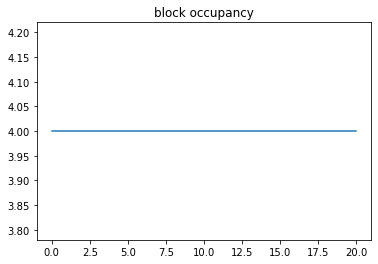

In [41]:
occ = occupancy_array(block, 20, 20)  
plt.plot(occ)
plt.title('block occupancy')

### 4.2 Spaceship and Oscillator pattern

Text(0.5, 1.0, 'glider occupancy')

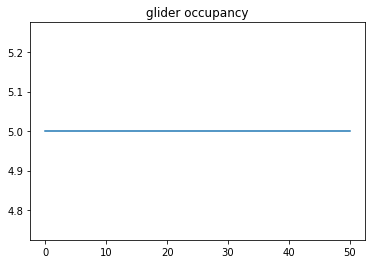

In [42]:
occ = occupancy_array(glider, 50, 50)  
plt.plot(occ)
plt.title('glider occupancy')

Text(0.5, 1.0, 'pentadecathlon occupancy')

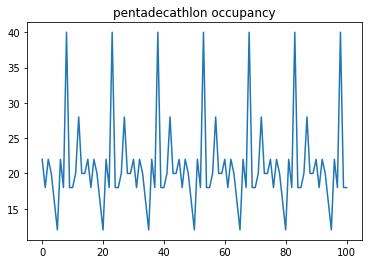

In [43]:
occ = occupancy_array(pentadecathlon, 100, 50)  
plt.plot(occ)
plt.title('pentadecathlon occupancy')

### 4.3 Spaceship generator and Space filler

Text(0.5, 1.0, 'conway pattern occupancy')

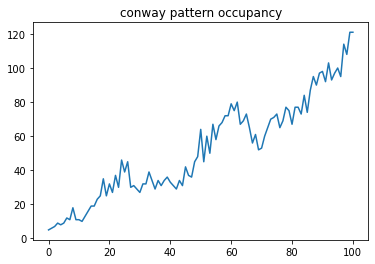

In [44]:
occ = occupancy_array(conway, 100, 100, 'middle')  
plt.plot(occ)
plt.title('conway pattern occupancy')

Text(0.5, 1.0, 'max pattern occupancy')

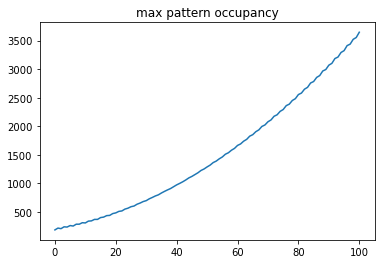

In [45]:
occ = occupancy_array(maxCoe, 100, 200, 'middle')  
plt.plot(occ)
plt.title('max pattern occupancy')

Text(0.5, 1.0, 'puffer occupancy')

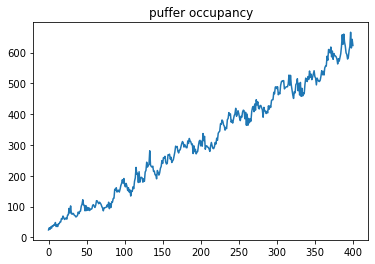

In [46]:
occ = occupancy_array(puffer, 400, 200, 'middle')  
plt.plot(occ)
plt.title('puffer occupancy')

## 5. Frequency analysis

In [47]:
# returns the type of the pattern and its period
def freq_calculator(pattern):
    pattern_size = pattern.shape #get dimension of pattern

    grid = create_grid(pattern=pattern) #create the grid with the pattern
    N=grid.shape[0]
    u_grid = grid.copy()

    pattern_type = 'Nothing' #default pattern type and frequency
    frequency = 0
    
    for i in range(50):
        u_grid = update_grid(u_grid) #update of the grid

        for j in range(N):
            for k in range(N):
                # if it is a still lifes
                if (np.array_equal(u_grid,grid)) and (i == 0):
                    pattern_type = 'Still Lifes'
                    frequency = i+1
                    return pattern_type, frequency
                
                # if it is an oscillator
                if (i > 0) and (np.array_equal(u_grid,grid)):
                    pattern_type = 'Oscillator'
                    frequency = i+1
                    return pattern_type, frequency
                
                # if it is a spaceship
                if (i > 0) and (np.array_equal(u_grid[j:j+pattern_size[0],k:k+pattern_size[1]],pattern)) and (np.array_equal(u_grid,grid) == False) and (np.sum(u_grid) == np.sum(grid)):
                    pattern_type = 'Spaceship'
                    frequency = i+1
                    return pattern_type, frequency
                
                # if it is a pattern that ganerates spaceships
                if (i > 0) and (np.array_equal(u_grid[j:j+pattern_size[0],k:k+pattern_size[1]],pattern)) and (np.array_equal(u_grid,grid) == False):
                    pattern_type = 'Spaceship generator'
                    frequency = i+1
                    return pattern_type, frequency
    
    return pattern_type, frequency

### 5.1 Still lifes and random pattern

In [48]:
# Block 
print(" Block : Type = %s, Frequency = %s" % freq_calculator(block))

# Loaf
print("\n Loaf : Type = %s, Frequency = %s" % freq_calculator(loaf))

# Random
print("\n Random pattern : Type = %s, Frequency = %s" % freq_calculator(np.random.randint(2, size=(3,4))))

 Block : Type = Still Lifes, Frequency = 1

 Loaf : Type = Still Lifes, Frequency = 1

 Random pattern : Type = Nothing, Frequency = 0


### 5.2 Oscillators and spaceships

In [49]:
# Blinker
print(" Blinker : Type = %s, Frequency = %s" % freq_calculator(blinker))

# Penta decathlon
print("\n Penta decathlon : Type = %s, Frequency = %s" % freq_calculator(pentadecathlon))

# Glider
print("\n Glider : Type = %s, Frequency = %s" % freq_calculator(glider))

# Lightweight spaceship
print("\n Lightweight spaceship: Type = %s, Frequency = %s" % freq_calculator(lightweight_spaceship))

# Heavyweight spaceship
print("\n Heavyweight spaceship: Type = %s, Frequency = %s" % freq_calculator(heavyweight_spaceship))

# Glinder cannon
print("\n Glider Cannon : Type = %s, Frequency = %s" % freq_calculator(glider_gun))

# Puffer
print("\n Puffer : Type = %s, Frequency = %s" % freq_calculator(puffer))

 Blinker : Type = Oscillator, Frequency = 2

 Penta decathlon : Type = Oscillator, Frequency = 15

 Glider : Type = Spaceship, Frequency = 4

 Lightweight spaceship: Type = Spaceship, Frequency = 4

 Heavyweight spaceship: Type = Spaceship, Frequency = 4

 Glider Cannon : Type = Spaceship generator, Frequency = 30

 Puffer : Type = Spaceship generator, Frequency = 20


## 6. Heat analysis

In [50]:
def heat_calculator(pattern):
    ptype, freq = freq_calculator(pattern)
    heat = 0
    if ptype != 'Oscillator' and ptype != 'Spaceship':
        return heat
    
    grid = create_grid(pattern=pattern) #create the grid with the pattern
    N=grid.shape[0]
    u_grid = grid.copy()
    
    for i in range(freq):
        u_grid = update_grid(u_grid) #update of the grid
        heat = heat + np.sum(np.absolute(grid-u_grid))
        grid = u_grid.copy()
    return heat/freq

### 6.1 Still lifes

In [51]:
# Block
print(" Block : Heat = %s" % heat_calculator(block))

# Biggest still life
print("\n Biggest still life: Heat = %s" % heat_calculator(biggest_still_life))

 Block : Heat = 0

 Biggest still life: Heat = 0


### 6.2 Oscillators and Spaceships

In [52]:
# Blinker
print(" Blinker : Heat = %s" % heat_calculator(blinker))

# Penta decathlon
print("\n Penta decathlon : Heat = %s" % heat_calculator(pentadecathlon))

# Pulsar
print("\n Pulsar : Heat = %s" % heat_calculator(pulsar))

# Glider
print("\n Glider : Heat = %s" % heat_calculator(glider))

# Middleweight spaceship
print("\n Middleweight spaceship : Heat = %s" % heat_calculator(middleweight_spaceship))

 Blinker : Heat = 4.0

 Penta decathlon : Heat = 22.4

 Pulsar : Heat = 42.666666666666664

 Glider : Heat = 4.0

 Middleweight spaceship : Heat = 15.0


## 7. Speed analysis

In [53]:
def speed_calculator(pattern):
    ptype, freq = freq_calculator(pattern)
    speed = 0
    if ptype != 'Spaceship':
        return speed
    
    grid = create_grid(pattern=pattern) #create the grid with the pattern
    N=grid.shape[0]
    u_grid = grid.copy()
    
    for i in range(freq):
        u_grid = update_grid(u_grid) #update of the grid
    
    speed = np.max(np.absolute(np.amax(np.where(grid == 1), axis=1)-np.amax(np.where(u_grid == 1), axis=1)))
    speed = speed/4
    
    return 'c*' + str(speed)

### 7.1 Still lifes and Oscillators

In [54]:
# Boat
print(" Boat : Speed = %s" % speed_calculator(boat))

# Beacon
print("\n Beacon : Speed = %s" % speed_calculator(beacon))

 Boat : Speed = 0

 Beacon : Speed = 0


### 7.2 Spaceships

In [55]:
# Glider
print(" Glider : Speed = %s" % speed_calculator(glider))

# Lightweight spaceship
print(" Lightweight spaceship : Speed = %s" % speed_calculator(lightweight_spaceship))

# Middleweight spaceship
print(" Middleweight spaceship : Speed = %s" % speed_calculator(middleweight_spaceship))

# Heavyweight spaceship
print(" Heavyweight spaceship : Speed = %s" % speed_calculator(heavyweight_spaceship))

 Glider : Speed = c*0.25
 Lightweight spaceship : Speed = c*0.5
 Middleweight spaceship : Speed = c*0.5
 Heavyweight spaceship : Speed = c*0.5


## 8. GoF 1D

#### One-Dimensional Life
This one-dimensional version was published in BYTE magazine in December, 1978.
The evolution rule is based on a five-cell neighborhood, YYXYY, where the next generation of the center cell X depends on its own state and those of the four Y cells. The rule is: (1) a cell is born if it has 2 or 3 Y-neighbors alive, and (2) a living cell survives if it has 2 or 4 Y-neighbors.

Stephen Wolfram's A New Kind of Science, published in 2002 by Wolfram Media. Wolfram had a systematic classification of one-dimensional cellular automata.

### 8.1 Creation of the grid
It consider a grid where the first row is the initial seed, the next rows are the update of the 1-dimensional array

In [56]:
def create_grid_1D(N=15, pattern=random):
    grid = np.zeros((80, N))
    # we add the pattern to the grid (declaration above)
    grid = add_pattern_to_grid_1D(grid, pattern)
    return grid

### 8.2 Add the Patter to the grid

In [57]:
def add_pattern_to_grid_1D(grid, pattern):
    # dimension of the pattern
    c = np.size(pattern,axis=0)
    #print(c)
    N = np.size(grid,axis=1) # number of columns (= number of lines)
    grid[0] = pattern # add the pattern in the middle
        
    return grid

### 8.3 Update function

In [58]:
def update_array_1D(frameNum, img, grid):
    N = np.size(grid,axis=1)
    M = np.size(grid,axis=0)
    grid_tmp = grid.copy() # not to mess up with the original one
    for i in range(N):
        for j in range(M-1):
            # get the total number of neighbors of the cell
            neighbors = grid[j, (i+1)%N] + grid[j, (i+2)%N] + grid[j, (i-1)%N] + grid[j, (i-2)%N]
            
            # check if it is still alive or not
            if grid[j, i] == alive:
                if (neighbors == 2) or (neighbors == 4):
                    grid_tmp[j+1, i] = alive
            else:
                if (neighbors == 3) or (neighbors == 2): 
                    grid_tmp[j+1, i] = alive
                
    grid[:] = grid_tmp[:] # change the old grid
    img.set_data(grid_tmp) # update the image
    
    return img, grid

### 8.4 Animation function

In [59]:
def show_GoF_1D(grid, frames=200,interval=200):
    # show the grid 
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest', cmap='Greys') 
    animation_grid = FuncAnimation(fig, update_array_1D, fargs=(img, grid, ), frames=50, interval=200, save_count=50) # animation  # init_func=create_grid
    plt.close()
    
    return animation_grid

### 8.5 Patterns
After a certain number of generations, the patter in Game of Life in 1D show a little "Figure"

In [60]:
N = 60 # for all the patterns, fill the array of dimension 40

#### 8.5.1 Spider

In [61]:
spider = np.zeros(N)
spider[spider.shape[0]//2:spider.shape[0]//2+6] = [alive, alive, alive, alive, alive, alive]

#### 8.5.2 Glider

In [62]:
glider = np.zeros(N)
glider[glider.shape[0]//2:glider.shape[0]//2+5] = [alive, dead, alive, alive, alive]

#### 8.5.3 FlipFlop

In [63]:
flipflop = np.zeros(N)
flipflop[flipflop.shape[0]//2:flipflop.shape[0]//2+5] = [alive, 0, alive, alive, 0]

#### 8.5.4 Face

In [64]:
face = np.zeros(N)
face[face.shape[0]//2:face.shape[0]//2+7] = [alive, alive, alive, alive, alive, alive, alive]

#### 8.5.5 Viperine

In [65]:
viperine = np.zeros(N)
viperine[viperine.shape[0]//2:viperine.shape[0]//2+25] = [alive, 0, alive, 0, 0, alive, 0, 0, 0, alive, alive, alive, alive, 0, 0, alive, alive, 0, 0, alive, alive, 0, 0, alive, alive]

### 8.6 Random pattern

In [66]:
random = np.random.choice(vals, (N)*(1), p=[0.4, 0.6])
grid_1D = create_grid_1D(N, pattern=random)
animation_1D = show_GoF_1D(grid_1D)
HTML(animation_1D.to_html5_video())

### 8.7 Try different patterns

In [67]:
grid_1D = create_grid_1D(N, pattern=viperine) # CHANGE THE PATTERN HERE
animation_1D = show_GoF_1D(grid_1D)
HTML(animation_1D.to_html5_video())

## 9. Final Discussion

<p style='text-align: justify;'>Game of Life is used in a lot of differnt field, such as computer science, biology, physics and economy. They take advantage of Game of Life looking at how a pattern, simple or complex, can evolve. It is used either for the counter-intuitive notion that design and organization can spontaneously emerge in the absence of a designer, for example the color pattern in a shell. This is know as <b><i>Rule 30</i></b>, an elementary cellular automaton introduced by Stephen Wolfram in early 80s. It displays aperiodic, chaotic behaviour. </p>
<img src="images/shell.jpeg" width="200" height="200" align="center"/> </br>

<p style='text-align: justify;'>Another very interesting application of Game of Life is the possibility to build a <i>Turing machine</i>, with the different parts that make the computer work and, at least theoretically, do computations. For example it uses the patterns for build NAND and the Glider generator as Clock. </p>
<p style='text-align: justify;'>In our work we wrote the code for display a general NxN grid with a initial pattern, that can be a random pattern or one of the most common and most used patterns. After that, the updates following the Conway's Game of Life are used in order to show how the initial pattern evolves during time, also defined as a <i>generation</i>. We shown the three different types of most common patters: still lifes, oscillators and spaceships. For each one of them we described the characteristics, for example the period and the occupancy. For the more complex patterns these characteristic are not all available, because the successive generations have a more "random" and unpredictable result: they don't have periodicity, a fixed occupancy or a bounding box. </br>
We designed our code in order to have a general method were it is possible to insert the desired pattern and the dimension of the grid, in this way it is only necessary to run a single cell of code in the notebook. We implemented a simple posotioning for the patterns (center or top-left) that put the pattern in the specified position. </br>
In the last section we provided an analysis of the periodicity and occupancy of the patterns. The period found for the most simple patterns confirm the data in the description, proving that our method can find if a pattern repeat itself after some certain number of generations. In the occupancy we analyzed how a pattern evolve during time in the cell occupancy of the grid. The results show, as expected, that still lifes patterns have a constant number of cells alive, while the oscillators have a periodic graph, that repeats in time. For the more complex patterns we can show how the grid occupancy evolves. In the case of Conway pattern, the graph shows how the number of alive cells grow with a periodic little decreasing, while in the Puffer it is a more gradually increasing. The more interesting result is Max Coe, that shows a almost linear increasing, as we can see in the animation. In this patter the number of cells with life increase almost linearly with the time until all the grid is a divided in lines of dead and alive cells. </p>

<p style='text-align: justify;'>The last part is about a different Game of Life approach for the 1 dimensional space. It has different rules in order to manage an array of one dimension instead a grid. The evolution is still visualized with a grid that has as rows the generations starting from the initial pattern at the top.</p>

## 10. References
[1] https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/ </br>
[2] https://en.wikipedia.org/wiki/Conway's_Game_of_Life </br>
[3] https://www.conwaylife.com/wiki/Main_Page </br>
[4] http://web.mit.edu/sp.268/www/2010/lifeSlides.pdf </br>
[5] http://jonmillen.com/1dlife/index.html </br>